# loading necessary libraries

In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

# loading data

In [2]:
class Config:
    def __init__(self):
        self.ROOT_DATA_DIR="fashionMNISTDir"
        self.epochs=10
        self.batch_size=32
        self.learning_rate=0.01
        self.image_size=(28,28)
        self.DEVICE="cuda" if torch.cuda.is_available() else "cpu"
        print(f"this notebook is using Device: {self.DEVICE}")
        self.SEED=2022
        
config=Config()

this notebook is using Device: cpu


In [3]:
train_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=True,
    download= True,
    transform= transforms.ToTensor()
    
)


test_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=False,
    download= True,
    transform= transforms.ToTensor()
    
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.09MB/s]


Extracting fashionMNISTDir/FashionMNIST/raw/train-images-idx3-ubyte.gz to fashionMNISTDir/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 139kB/s]


Extracting fashionMNISTDir/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fashionMNISTDir/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.53MB/s]


Extracting fashionMNISTDir/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fashionMNISTDir/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.5MB/s]

Extracting fashionMNISTDir/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fashionMNISTDir/FashionMNIST/raw



In [4]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [5]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [6]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets.shape

torch.Size([60000])

In [8]:
given_label_map=train_data.class_to_idx
given_label_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
label_map={ key:val for key,val in given_label_map.items()}
label_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
label_map={ val:key for key,val in given_label_map.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [11]:
def view_sample_img(data,index,label_map) : 
  plt.imshow(data.data[index],cmap="gray")
  plt.title(f" data_label: {label_map[data.targets[index].item()]}")
  plt.axis("off")

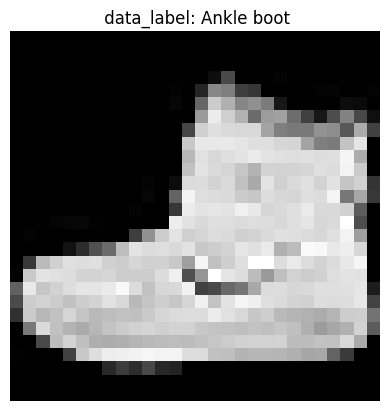

In [12]:
view_sample_img(train_data,0  ,label_map)

In [13]:
#create a dataLoader - it will help you pass the data batch by batch data and not the whole data in one go


train_data_loader = DataLoader(
    dataset = train_data,
    batch_size=config.batch_size,
    shuffle=True
)


test_data_loader = DataLoader(
    dataset = test_data,
    batch_size=config.batch_size,
    shuffle=False
)

In [14]:
for images,labels in test_data_loader:
  print(images.shape)
  print(labels.shape)
  break

for images,labels in train_data_loader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])


In [15]:
images[0].shape

torch.Size([1, 28, 28])

In [16]:
images[0].squeeze().shape

torch.Size([28, 28])

In [17]:
images[0].shape

torch.Size([1, 28, 28])

In [18]:
#convert that torch into numpy array 

images[0].squeeze().numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
images[0].shape,images[0].squeeze().shape,images[0].unsqueeze(dim=1).shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]), torch.Size([1, 1, 28, 28]))

# Defining CNN architecture

In [55]:


class CNN(nn.Module):
  def __init__(self, in_, out_):
    super(CNN, self).__init__()

    self.conv_pool_01 = nn.Sequential(
        nn.Conv2d(in_channels=in_, out_channels=8, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.conv_pool_02 = nn.Sequential(
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.Flatten = nn.Flatten()
    self.FC_01 = nn.Linear(in_features=16*4*4, out_features=128)
    self.FC_02 = nn.Linear(in_features=128, out_features=64)
    self.FC_03 = nn.Linear(in_features=64, out_features=out_)

  def forward(self, x):
    x = self.conv_pool_01(x)
    x = self.conv_pool_02(x)
    x = self.Flatten(x)
    x = self.FC_01(x)
    x = F.relu(x)
    x = self.FC_02(x)
    x = F.relu(x)    
    x = self.FC_03(x)
    return x

In [21]:
model=CNN(1,10)

print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [22]:
model.parameters()

<generator object Module.parameters at 0x7fd87aa38190>

In [23]:
next(model.parameters()).is_cuda

False

In [24]:
model.to(config.DEVICE)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [26]:
import pandas as pd

In [27]:
def count_params(model):
  model_params = {"Modules": list(), "Parameters": list()}
  total = {"trainable": 0, "non_trainable": 0} 
  for name, parameters in model.named_parameters():
    param = parameters.numel()
    if not parameters.requires_grad:
      total["non_trainable"] += param
      continue
    model_params["Modules"].append(name)
    model_params["Parameters"].append(param)
    total["trainable"] += param
  df = pd.DataFrame(model_params)
  df = df.style.set_caption(f"Total parameters: {total}")
  return df

count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


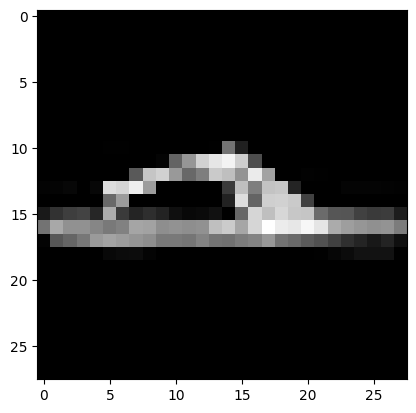

In [28]:
plt.imshow(images[0].squeeze(),cmap="gray")

# Training Loop

In [30]:
criterion = nn.CrossEntropyLoss() #this is our predefined loss function
optimizer = torch.optim.Adam(model.parameters(),lr=config.learning_rate) #Adam Optimisers

In [31]:
len(train_data_loader) #steps per epochs

1875

In [32]:
for epoch in range(config.epochs):
  with tqdm(train_data_loader) as tqdm_epoch:
    for images,labels in tqdm_epoch:
      tqdm_epoch.set_description(f"EPOCH{epoch+1}/ {config.epochs}")

      #put the images on cuda device
      images=images.to(config.DEVICE)
      labels=labels.to(config.DEVICE)

      #forward pass
      output = model(images)
      loss= criterion(output,labels) #this is our loss function 

      #backward propagation
      optimizer.zero_grad() #make the weights and biases as zero
      loss.backward() # do backward propagation to calculate gradient to see what to update the new weights with 
      optimizer.step() #weights updated 


      tqdm_epoch.set_postfix(loss=loss.item()) #.item is used to get the numerical value of that function

EPOCH10/ 10: 100%|██████████| 1875/1875 [00:26<00:00, 70.82it/s, loss=0.346] 


In [33]:
os.makedirs("model_dir",exist_ok=True)
model_file_path= os.path.join("model_dir","CNN_model.pth")
torch.save(model,model_file_path)

# Load the model again

In [34]:
loaded_model=torch.load(model_file_path)

<ipython-input-34-d28b44314f94>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model=torch.load(model_file_path)


# Evaluate the  model

In [35]:
pred= np.array([])
target= np.array([])

with torch.no_grad():
  for batch,data in enumerate(test_data_loader):
    images=data[0].to(config.DEVICE)
    labels=data[1].to(config.DEVICE)

    y_pred=model(images)

    pred = np.concatenate((pred,torch.argmax(y_pred,1).cpu().numpy()))
    target=np.concatenate((target,labels.cpu().numpy()))

In [36]:
cm=confusion_matrix(target,pred)

label_map.values()

dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

<Axes: >

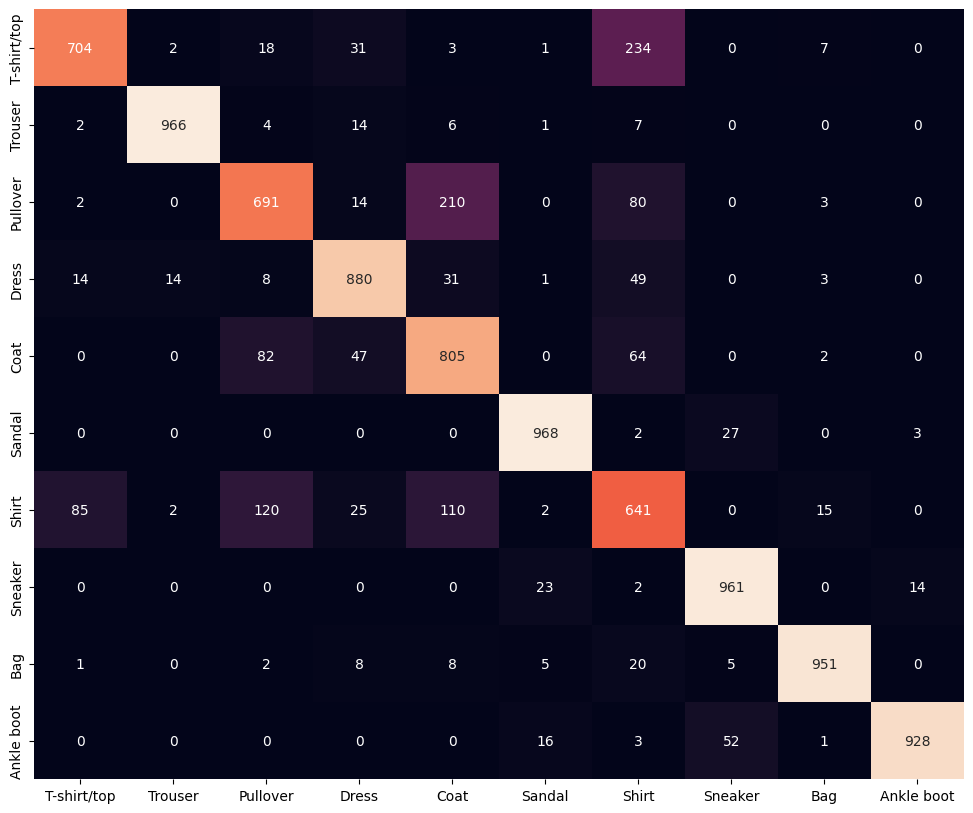

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=label_map.values(),yticklabels=label_map.values(),cbar=False)

In [38]:
data=next(iter(test_data_loader))
data
     

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [39]:
len(data)

2

In [40]:
images,labels=data

In [41]:
images.shape

torch.Size([32, 1, 28, 28])

In [42]:
idx=2
img=images[idx]
img.shape

torch.Size([1, 28, 28])

In [43]:
label=labels[idx]
label_map[label.item()]

'Trouser'

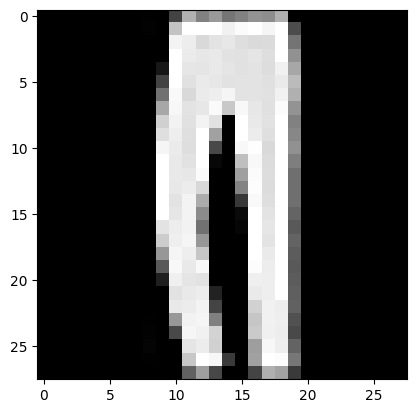

In [44]:
plt.imshow(img.squeeze(),cmap='gray')

In [45]:
img.unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [46]:
logit=model(img.unsqueeze(dim=1).to(config.DEVICE))
logit

tensor([[ -23.2579,   24.3120,   -2.6657,  -10.8149,    2.1897,  -53.9380,
          -16.3713, -121.7163,  -27.1549, -105.0432]],
       grad_fn=<AddmmBackward0>)

In [47]:
sum([ -41.4237,   35.2823,  -62.3171,  -18.0354,  -30.5634, -336.7688,-25.5911, -459.0298,  -73.0442, -303.7631])

-1315.2543

In [48]:
pred_prob=F.softmax(logit,dim=1)
pred_prob

tensor([[2.1911e-21, 1.0000e+00, 1.9221e-12, 5.5540e-16, 2.4686e-10, 1.0387e-34,
         2.1452e-18, 0.0000e+00, 4.4484e-23, 0.0000e+00]],
       grad_fn=<SoftmaxBackward0>)

In [49]:
sum([4.8641e-34, 1.0000e+00, 4.1058e-43, 6.9886e-24, 2.5325e-29, 0.0000e+00,
         3.6560e-27, 0.0000e+00, 0.0000e+00, 0.0000e+00])

1.0

In [50]:
argmax=(torch.argmax(pred_prob)).item()
argmax

1

In [51]:
label_map[argmax]

'Trouser'

In [52]:
def predict(data,model,label_map,device,idx=0):
  images,labels=data
  img=images[idx]
  labels=labels[idx] 

  plt.imshow(img.squeeze(),cmap='gray')
  logit=model(img.unsqueeze(dim=1).to(config.DEVICE))
  pred_prob=F.softmax(logit,dim=1)
  argmax=(torch.argmax(pred_prob)).item()
  predicted_label=label_map[argmax]
  actual_label =label_map[label.item()]

  plt.title(f"actual: {actual_label}| predicted : {predicted_label}")
  plt.axis("off")
  return predicted_label, actual_label

('Trouser', 'Trouser')

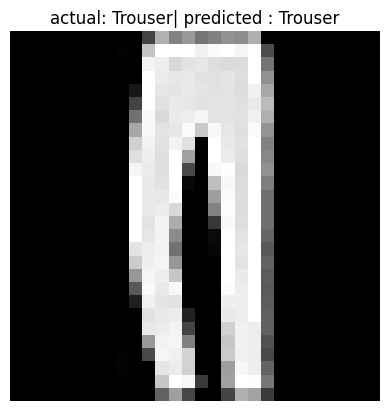

In [53]:
predict(data,model,label_map,config.DEVICE,idx=2) 